In [2]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

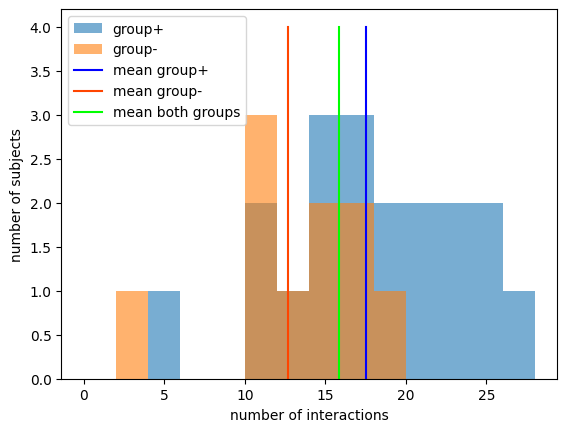

In [ ]:
# F test for twp group comparison

# 2 groups unpaired

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/brain_mouse.csv'

data = pd.read_csv(url)

plus_group = data.interactions[data.genotype=='Plus']
minus_group = data.interactions[data.genotype=='Minus']
both_groups = data.interactions

plus_mean,minus_mean,both_mean = plus_group.mean(),minus_group.mean(),both_groups.mean()

plt.hist(plus_group, bins = np.arange(0,30,2), alpha = 0.6, label = 'group+')
plt.hist(minus_group, bins = np.arange(0,30,2), alpha = 0.6, label = 'group-')
plt.plot([plus_mean,plus_mean],[0,4],color = 'blue', label = 'mean group+')
plt.plot([minus_mean,minus_mean],[0,4],color = 'orangered', label = 'mean group-')
plt.plot([both_mean,both_mean],[0,4],color = 'lime', label = 'mean both groups')
plt.legend(loc = 'upper left')
plt.xlabel('number of interactions')
plt.ylabel('number of subjects')
plt.show()


F = 5.7163 , p-value = 0.024


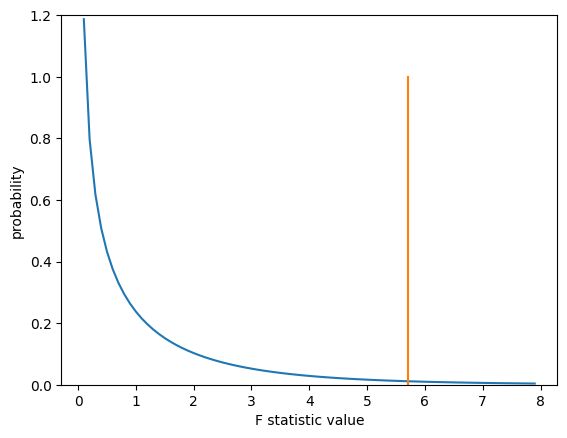

In [ ]:
# compare two groups using F distribution

N_plus,N_minus = len(plus_group),len(minus_group)

SSx = N_plus*(both_mean-plus_mean)**2 + N_minus*(both_mean-minus_mean)**2
MSx = SSx/(2-1)

SSres = np.sum((plus_group-plus_mean)**2) + np.sum((minus_group-minus_mean)**2)
MSres = SSres/(N_plus+N_minus-2)

F = MSx/MSres
p = 1-stats.f.cdf(F,1,N_plus+N_minus-2)

print('F = {} , p-value = {}'.format(round(F,4),round(p,4)))

plt.plot(np.arange(0,8,0.1),stats.f.pdf(np.arange(0,8,0.1),1,N_plus+N_minus-2), label = 'F(1,27) distribution')
plt.plot([F,F] , [0,1] , label = 'F statistics')
plt.xlabel('F statistic value')
plt.ylabel('probability')
plt.ylim((0,1.2))
plt.show()

In [ ]:
# comparison two regression lines

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/weight_height.csv'
data = pd.read_csv(url)

print(data)


       Group     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


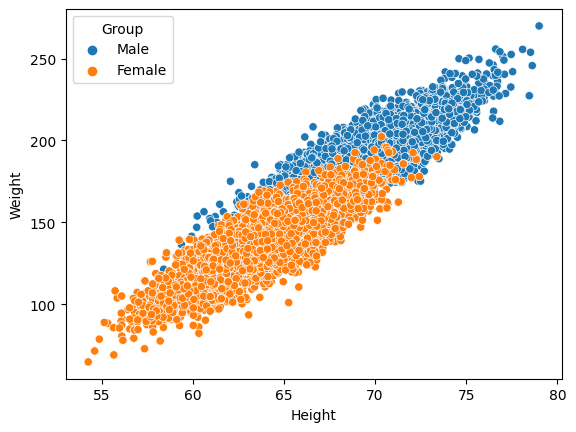

In [ ]:
# presentation

sns.scatterplot(data = data, x = 'Height', y = 'Weight', hue = 'Group')
plt.show()


In [ ]:
# separate linear models for two groups

height_m,weight_m = data.Height[data.Group == 'Male'],data.Weight[data.Group == 'Male']

b1_m = np.dot((height_m-height_m.mean()),(weight_m-weight_m.mean()))/np.dot((height_m-height_m.mean()),(height_m-height_m.mean()))
b0_m = weight_m.mean()-b1_m*height_m.mean()

yhat_m = b0_m+b1_m*height_m

N_m = len(weight_m)
SSres_m = np.dot((weight_m-yhat_m),(weight_m-yhat_m))
Syx2_m = SSres_m/(N_m-2)

print('weight(height) for males model: b0 = {} , b1 = {} , Syx2 = {}'.format(round(b0_m,4),round(b1_m,4),round(Syx2_m,4)))


height_f, weight_f= data.Height[data.Group == 'Female'],data.Weight[data.Group == 'Female']

b1_f = np.dot((height_f-height_f.mean()),(weight_f-weight_f.mean()))/np.dot((height_f-height_f.mean()),(height_f-height_f.mean()))
b0_f = weight_f.mean()-b1_f*height_f.mean()

yhat_f = b0_f+b1_f*height_f

N_f = len(weight_f)
SSres_f = np.dot((weight_f-yhat_f),(weight_f-yhat_f))
Syx2_f = SSres_f/(N_f-2)

print('weight(height) for females model: b0 = {} , b1 = {} , Syx2 = {}'.format(round(b0_f,4),round(b1_f,4),round(Syx2_f,4)))



weight(height) for males model: b0 = -224.4988 , b1 = 5.9618 , Syx2 = 99.9046
weight(height) for females model: b0 = -246.0133 , b1 = 5.994 , Syx2 = 100.6754


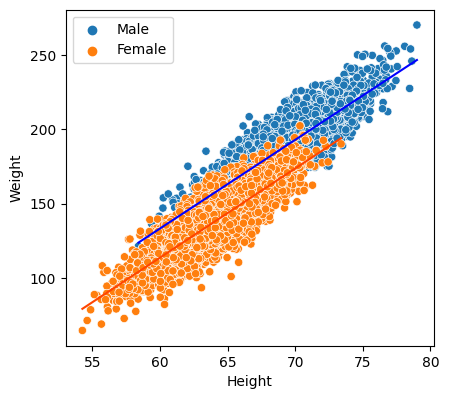

In [ ]:
# presentation
fig,ax = plt.subplots(1,1)
sns.scatterplot(data = data, x = 'Height', y = 'Weight', hue = 'Group')
sns.lineplot(x = height_m, y = yhat_m, color = 'blue')
sns.lineplot(x = height_f, y = yhat_f, color = 'orangered')
fig.subplots_adjust(bottom=0.2, right=0.7, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


In [ ]:
# significance of coefficients

Sb1_m = (Syx2_m/(height_m.var(ddof=1)*(N_m-1))**0.5)
b1_m_tstat = b1_m/Sb1_m
b1_m_p = 1-stats.t.cdf(abs(b1_m_tstat),N_m-2)

SSreg_m = np.dot((weight_m.mean()-yhat_m),(weight_m.mean()-yhat_m))
SStot_m = np.dot((weight_m-weight_m.mean()),(weight_m-weight_m.mean()))
R2_m = SSreg_m/SStot_m
f2_m = SSreg_m/SSres_m
print('b1 males: p-value = {} , R2 = {} , f2 = {}'.format(round(b1_m_p,4),round(R2_m,4),round(f2_m,4)))


Sb1_f = (Syx2_m/(height_f.var(ddof=1)*(N_f-1))**0.5)
b1_f_tstat = b1_f/Sb1_f
b1_f_p = 1-stats.t.cdf(abs(b1_f_tstat),N_f-2)

SSreg_f = np.dot((weight_f.mean()-yhat_f),(weight_f.mean()-yhat_f))
SStot_f = np.dot((weight_f-weight_f.mean()),(weight_f-weight_f.mean()))
R2_f = SSreg_f/SStot_f
f2_f = SSreg_f/SSres_f

print('b1 females: p-value = {} , R2 = {} , f2 = {}'.format(round(b1_f_p,4),round(R2_f,4),round(f2_f,4)))


b1 males: p-value = 0.0 , R2 = 0.7447 , f2 = 2.9175
b1 females: p-value = 0.0 , R2 = 0.7218 , f2 = 2.595


In [ ]:
# significance using F test

SSreg_m = np.dot((weight_m.mean()-yhat_m),(weight_m.mean()-yhat_m))
vreg_m = 2-1
MSreg_m = SSreg_m/vreg_m

SSres_m = np.dot((weight_m-yhat_m),(weight_m-yhat_m))
vres_m = N_m-2
MSres_m = SSres_m/vres_m

Fstat_m = MSreg_m/MSres_m

p_model_m = 1-stats.f.cdf(Fstat_m,vreg_m,vres_m)

print('weight(height) for males model significance: F stat = {} , p-value = {}'.format(round(Fstat_m,4),round(p_model_m,4)))

SSreg_f = np.dot((weight_f.mean()-yhat_f),(weight_f.mean()-yhat_f))
vreg_f = 2-1
MSreg_f = SSreg_f/vreg_f

SSres_f = np.dot((weight_f-yhat_f),(weight_f-yhat_f))
vres_f = N_f-2
MSres_f = SSres_f/vres_f

Fstat_f = MSreg_f/MSres_f

p_model_f = 1-stats.f.cdf(Fstat_f,vreg_f,vres_f)

print('weight(height) for females model significance: F stat = {} , p-value = {}'.format(round(Fstat_f,4),round(p_model_f,4)))


weight(height) for males model significance: F stat = 14581.4602 , p-value = 0.0
weight(height) for females model significance: F stat = 12969.7374 , p-value = 0.0


In [ ]:
# compare coefficients of two models

SSres_2 = (( (N_m-2)*SSres_m + (N_f-2)*SSres_f )/(N_m+N_f-4))**0.5
sb2 = SSres_2*( 1/((N_m-1)*height_m.var(ddof=1)) + 1/((N_f-1)*height_f.var(ddof=1)))**0.5

b1_2_tstat = (b1_m-b1_f)/sb2
p_2 = 1-stats.t.cdf(abs(b1_2_tstat) , N_m+N_f-4)

print('p-value for coefficient comparison = {}'.format(round(p_2,4)))

p-value for coefficient comparison = 0.4975


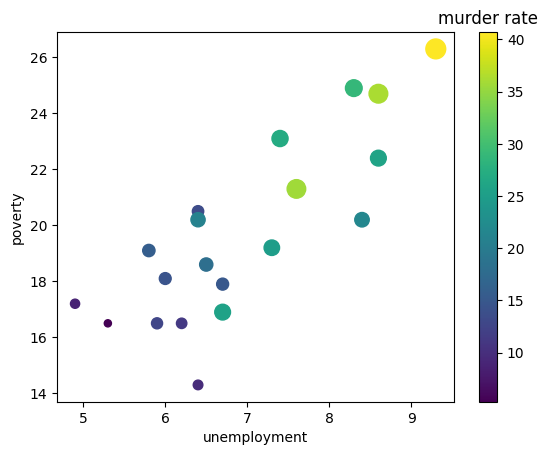

In [3]:
# multivaruate regression example

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/city_data.csv'
data = pd.read_csv(url)

plt.scatter(data.unemployment, data.poverty, cmap='viridis', c=data.murder_rate, s=data.murder_rate*5, alpha = 1 )
plt.xlabel('unemployment')
plt.ylabel('poverty')
plt.colorbar().ax.set_title('murder rate')
plt.show()

In [4]:
# fit linear regression model
y = data.murder_rate

X = np.array([np.ones(len(data.unemployment)), data.unemployment, data.poverty])
X = X.T

b = np.linalg.inv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-3)

SSres = (y-yhat).T@(y-yhat)
SSreg = (yhat-yhat.mean()).T@(yhat-yhat.mean())
SStot = (y-y.mean()).T@(y-y.mean())

R2 = SSreg/SStot
f2 = SSreg/SSres

print('b0 = {} , b1 = {} , b2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4)))
print('Syx2 = {} , R2 = {} , f2 = {}'.format(round(Syx2,4),round(R2,4),round(f2,4)))


b0 = -34.0725 , b1 = 4.3989 , b2 = 1.2239
Syx2 = 21.6084 , R2 = 0.802 , f2 = 4.0503


In [5]:
# model significance
SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
vreg = 3-1
MSreg = SSreg/vreg

SSres = np.dot((yhat-y),(yhat-y))
vres = len(y)-3
MSres = SSres/vres

Fstat = MSreg/MSres

p_model = 1-stats.f.cdf(Fstat,vreg,vres)

print('model significance: F stat = {} , p-value = {}'.format(round(Fstat,4),round(p_model,8)))



model significance: F stat = 34.4278 , p-value = 1.05e-06


In [6]:
# coefficient significance

Sb2_mat = Syx2*np.linalg.inv(X.T@X)
print(Sb2_mat) # diagonal value - variance of b0 b1 b2

b1_tstat = b[1]/(Sb2_mat[1,1])**0.5
b1_p = 1-stats.t.cdf(abs(b1_tstat),vres)
b2_tstat = b[2]/(Sb2_mat[2,2])**0.5
b2_p = 1-stats.t.cdf(abs(b2_tstat),vres)

print('model coefficient significance: b1 p-value = {} , b2 p-value = {}'.format(round(b1_p,4),round(b2_p,4)))


[[45.24640897 -2.20869699 -1.4629146 ]
 [-2.20869699  2.32919024 -0.70711143]
 [-1.4629146  -0.70711143  0.32285661]]
model coefficient significance: b1 p-value = 0.0052 , b2 p-value = 0.0229


In [7]:
# using statsmodel library example

import statsmodels.api as sm

x = data[['unemployment','poverty']]
y = data['murder_rate']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit() # OLS ordinary least squares
yhat = model.predict(x)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            murder_rate   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     34.43
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.05e-06
Time:                        12:00:21   Log-Likelihood:                -57.484
No. Observations:                  20   AIC:                             121.0
Df Residuals:                      17   BIC:                             124.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -34.0725      6.727     -5.065   

In [8]:
# addition test for poverty variable

X_without_poverty = X[:,(0,1)]

b_without_poverty = np.linalg.inv(X_without_poverty.T@X_without_poverty)@X_without_poverty.T@y

yhat_without_poverty = np.dot(X_without_poverty,b_without_poverty)

SSadd = (yhat_without_poverty-yhat).T@(yhat_without_poverty-yhat)
vadd = 3-2
MSadd = SSadd/vadd
Fadd = MSadd/MSres
p_add = 1-stats.f.cdf(Fadd,vadd,vres)

print('poverty variable contribution: p-value = {}'.format(round(p_add,4)))

poverty variable contribution: p-value = 0.0459


In [9]:
# addition test for unemployment variable

X_without_unemployment = X[:,(0,2)]

b_without_unemployment = np.linalg.inv(X_without_unemployment.T@X_without_unemployment)@X_without_unemployment.T@y

yhat_without_unemployment = np.dot(X_without_unemployment,b_without_unemployment)

SSadd = (yhat_without_unemployment-yhat).T@(yhat_without_unemployment-yhat)
vadd = 3-2
MSadd = SSadd/vadd
Fadd = MSadd/MSres
p_add = 1-stats.f.cdf(Fadd,vadd,vres)

print('unemployment variable contribution: p-value = {}'.format(round(p_add,4)))

unemployment variable contribution: p-value = 0.0103


In [10]:
# example 4

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/Prc_BF.csv'

data = pd.read_csv(url)

print(data)

     Pct_BF  Age  Weight  Height  Neck  Chest  Abdomen      Waist    Hip  \
0      12.3   23  154.25   67.75  36.2   93.1     85.2  33.543307   94.5   
1       6.1   22  173.25   72.25  38.5   93.6     83.0  32.677165   98.7   
2      25.3   22  154.00   66.25  34.0   95.8     87.9  34.606299   99.2   
3      10.4   26  184.75   72.25  37.4  101.8     86.4  34.015748  101.2   
4      28.7   24  184.25   71.25  34.4   97.3    100.0  39.370079  101.9   
..      ...  ...     ...     ...   ...    ...      ...        ...    ...   
245    11.0   70  134.25   67.00  34.9   89.2     83.6  32.913386   88.8   
246    33.6   72  201.00   69.75  40.9  108.5    105.0  41.338583  104.5   
247    29.3   72  186.75   66.00  38.9  111.1    111.5  43.897638  101.7   
248    26.0   72  190.75   70.50  38.9  108.3    101.3  39.881890   97.8   
249    31.9   74  207.50   70.00  40.8  112.4    108.5  42.716535  107.1   

     Thigh  Knee  Ankle  Bicep  Forearm  Wrist  
0     59.0  37.3   21.9   32.0     27.

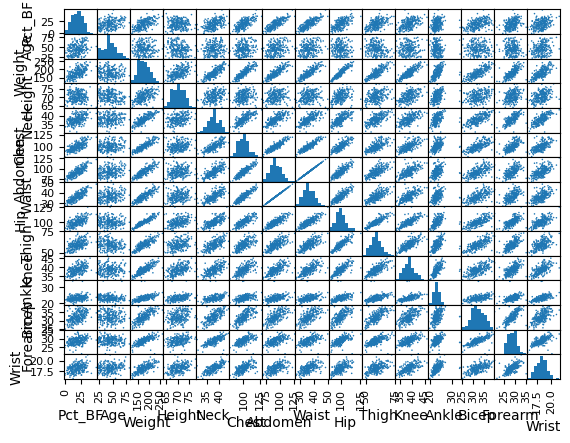

In [ ]:
#
pd.plotting.scatter_matrix(data, alpha=1, s = 5)
plt.show()


In [17]:
#
x = data.loc[:, data.columns != 'Pct_BF']

y = data['Pct_BF']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit() # OLS ordinary least squares
yhat = model.predict(x)

SSres = np.dot((yhat-y),(yhat-y))
vres = len(y)-len(model.params)
MSres = SSres/vres

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Pct_BF   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     50.50
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.12e-62
Time:                        12:04:21   Log-Likelihood:                -709.57
No. Observations:                 250   AIC:                             1449.
Df Residuals:                     235   BIC:                             1502.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7087     23.423      0.073      0.9

In [18]:
x = data.loc[:, ~data.columns.isin(['Pct_BF', 'Abdomen'])]

y = data['Pct_BF']

x = sm.add_constant(x)

model_no_abd = sm.OLS(y, x).fit() # OLS ordinary least squares
yhat_no_abd = model_no_abd.predict(x)

print(model_no_abd.summary())


                            OLS Regression Results                            
Dep. Variable:                 Pct_BF   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     54.61
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.50e-63
Time:                        12:04:31   Log-Likelihood:                -709.58
No. Observations:                 250   AIC:                             1447.
Df Residuals:                     236   BIC:                             1496.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6852     23.374      0.072      0.9

In [20]:
# addition test

SSadd = (yhat_no_abd-yhat).T@(yhat_no_abd-yhat)
vadd = 1
MSadd = SSadd/vadd
Fadd = MSadd/MSres
p_add = 1-stats.f.cdf(Fadd,vadd,vres)

print('abdomen variable contribution: p-value = {}'.format(round(p_add,4)))


abdomen variable contribution: p-value = 0.8813
